In [1]:
print('running')
import os
import glob
import sys
import itertools
import math
import logging
import json
import re
import random
import time
import concurrent.futures
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.lines as lines
from matplotlib.patches import Polygon
import imgaug
from imgaug import augmenters as iaa
import skimage.io

# Root directory of the project
ROOT_DIR = os.getcwd()
ROOT_DIR = os.path.dirname(os.path.dirname(ROOT_DIR))
print(ROOT_DIR)    
# Import Mask RCNN
sys.path.append(ROOT_DIR)
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
from mrcnn import model as modellib
from mrcnn.model import log

import cracks
LOGS_DIR = os.path.join(ROOT_DIR, "logs")
%matplotlib inline 
print(ROOT_DIR)

running


C:\Users\Shreyas\Anaconda3\lib\site-packages\skimage\io\manage_plugins.py:23: UserWarning: Your installed pillow version is < 7.1.0. Several security issues (CVE-2020-11538, CVE-2020-10379, CVE-2020-10994, CVE-2020-10177) have been fixed in pillow 7.1.0 or higher. We recommend to upgrade this library.
  from .collection import imread_collection_wrapper


C:\Users\Shreyas


ModuleNotFoundError: No module named 'keras'

In [7]:
print('ds')

ds


In [3]:
DATASET_DIR = os.path.join(ROOT_DIR, "datasets\\cracks")
print(DATASET_DIR)

# Use configuation from nucleus.py, but override
# image resizing so we see the real sizes here
class NoResizeConfig(cracks.CrackConfig):
    IMAGE_RESIZE_MODE = "none"
    
config = NoResizeConfig()

C:\Users\Shreyas\datasets\cracks


In [3]:
def get_ax(rows=1, cols=1, size=16):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Adjust the size attribute to control how big to render images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

In [3]:
DATASET_DIR


'C:\\Users\\Shreyas\\PycharmProjects\\Mask_RCNN\\datasets\\cracks'

In [4]:
# Load dataset
dataset = cracks.CrackDataset()
# The subset is the name of the sub-directory, such as stage1_train,
# stage1_test, ...etc. You can also use these special values:
#     train: loads stage1_train but excludes validation images
#     val: loads validation images from stage1_train. For a list
#          of validation images see nucleus.py
dat aset.load_cracks(DATASET_DIR, subset="train")

# Must call before using the dataset
dataset.prepare()

print("Image Count: {}".format(len(dataset.image_ids)))
print("Class Count: {}".format(dataset.num_classes))
for i, info in enumerate(dataset.class_info):
    print("{:3}. {:50}".format(i, info['name']))

Image Count: 0
Class Count: 2
  0. BG                                                
  1. cracks                                            


In [25]:
info=dataset.image_info[22]
info

IndexError: list index out of range

In [19]:
mask_dir = os.path.join(os.path.dirname(os.path.dirname(info['path'])), "masks")
mask_dir = os.path.join(mask_dir,info["id"])
mask_dir

'C:\\Users\\Shreyas\\PycharmProjects\\Mask_RCNN\\datasets\\cracks\\stage1_train\\masks\\424'

In [20]:
mask = []
for f in next(os.walk(mask_dir))[2]:
    if f.endswith(".png"):
        m = skimage.io.imread(os.path.join(mask_dir, f),as_gray=True)
        mask.append(m)

StopIteration: 

In [ ]:
mask = np.stack(mask, axis=-1)

[400 313 272]
574


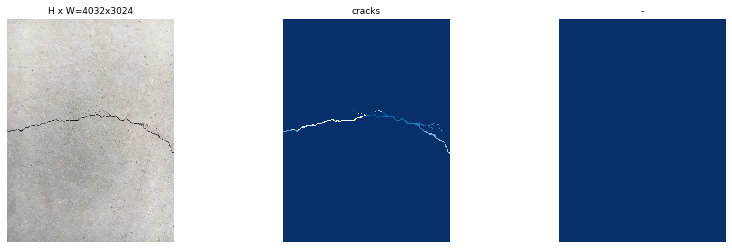

427


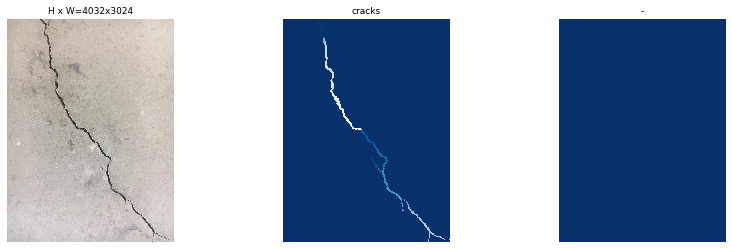

112


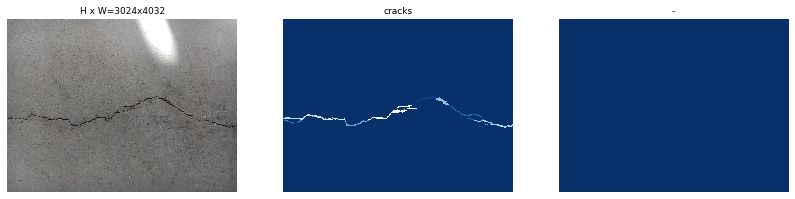

In [ ]:
image_ids = np.random.choice(dataset.image_ids, 3)
print(image_ids)
for image_id in image_ids:
    a=dataset.image_reference(image_id)
    print(a)
    image = dataset.load_image(image_id)
    mask, class_ids = dataset.load_mask(image_id)
    visualize.display_top_masks(image, mask, class_ids, dataset.class_names, limit=2)

In [ ]:
config1=cracks.CrackConfig()

image_id  275 364
image                    shape: (4032, 3024, 3)       min:    0.00000  max:  213.00000  uint8
mask                     shape: (4032, 3024, 25)      min:    0.00000  max:    1.00000  bool
class_ids                shape: (25,)                 min:    1.00000  max:    1.00000  int32
bbox                     shape: (25, 4)               min:    0.00000  max: 4032.00000  int32


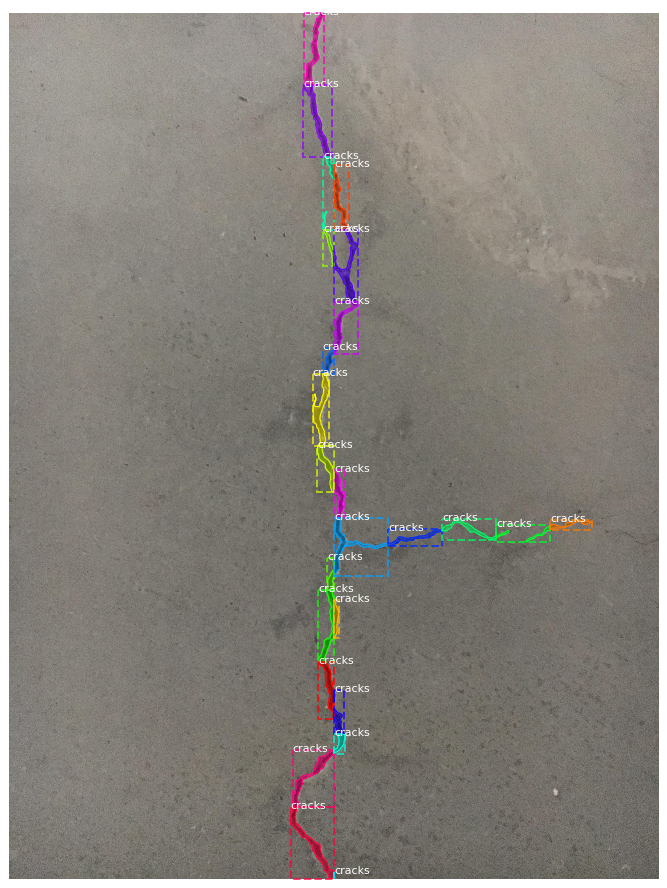

In [ ]:
image_id = random.choice(dataset.image_ids)
image = dataset.load_image(image_id)
mask, class_ids = dataset.load_mask(image_id)
# Compute Bounding box
bbox = utils.extract_bboxes(mask)

# Display image and additional stats
print("image_id ", image_id, dataset.image_reference(image_id))
log("image", image)
log("mask", mask)
log("class_ids", class_ids)
log("bbox", bbox)
# Display image and instances
visualize.display_instances(image, bbox, mask, class_ids, dataset.class_names,show_mask=True)

In [ ]:
image_id

275

In [ ]:
image = dataset.load_image(image_id)
mask, class_ids = dataset.load_mask(image_id)
original_shape = image.shape
image, window, scale, padding,crop = utils.resize_image(
    image, 
    min_dim=config1.IMAGE_MIN_DIM, 
    max_dim=config1.IMAGE_MAX_DIM,
    min_scale=None)
mask = utils.resize_mask(mask, scale, padding)
bbox = utils.extract_bboxes(mask)

image_id:  275 364
Original shape:  (4032, 3024, 3)
image                    shape: (512, 512, 3)         min:    0.00000  max:  208.00000  uint8
mask                     shape: (512, 512, 25)        min:    0.00000  max:    1.00000  bool
class_ids                shape: (25,)                 min:    1.00000  max:    1.00000  int32
bbox                     shape: (25, 4)               min:    0.00000  max:  512.00000  int32


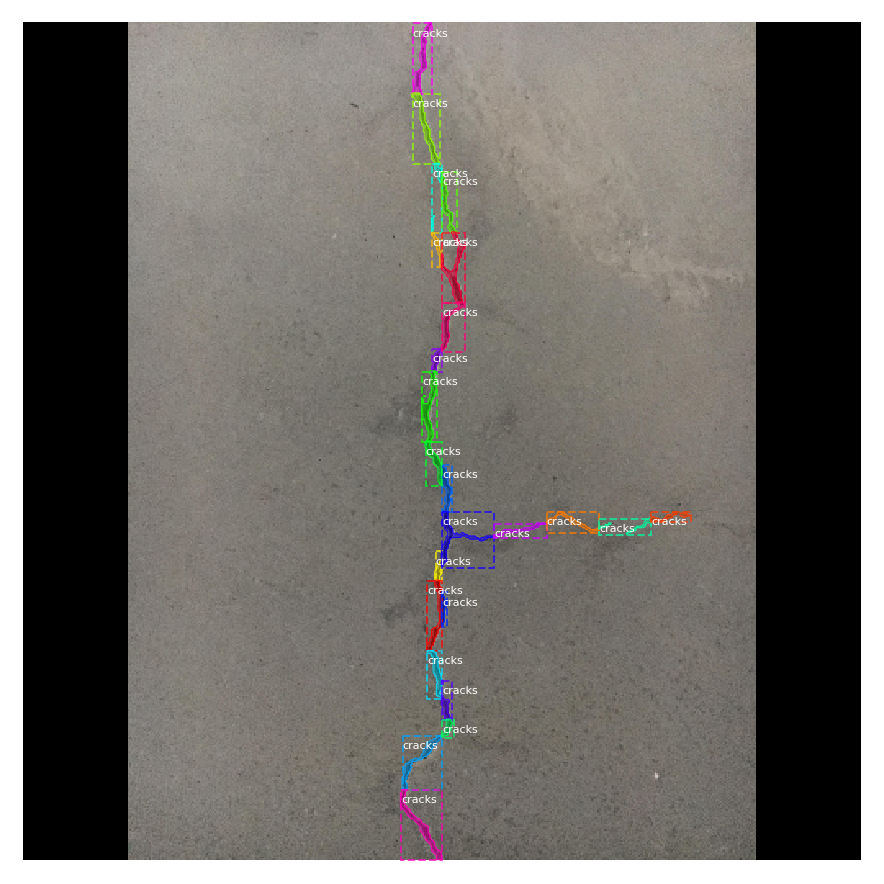

In [ ]:
print("image_id: ", image_id, dataset.image_reference(image_id))
print("Original shape: ", original_shape)
log("image", image)
log("mask", mask)
log("class_ids", class_ids)
log("bbox", bbox)
# Display image and instances
visualize.display_instances(image, bbox, mask, class_ids, dataset.class_names)

mask                     shape: (56, 56, 24)          min:    0.00000  max:    1.00000  bool
image                    shape: (512, 512, 3)         min:    0.00000  max:  208.00000  uint8


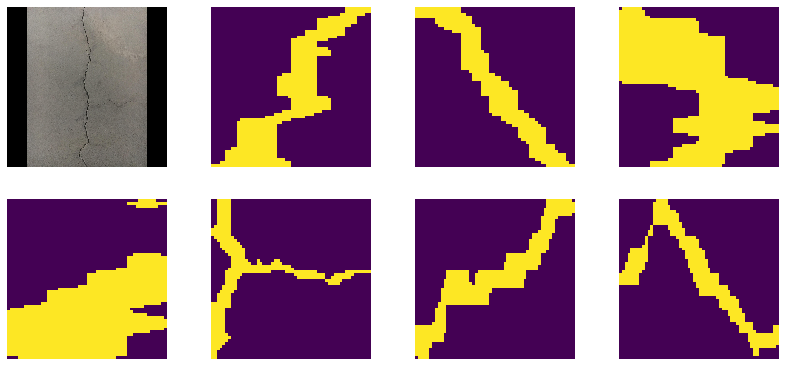

In [ ]:
image, image_meta, class_ids, bbox, mask = modellib.load_image_gt(
    dataset, config1, image_id, augment=False, use_mini_mask=True)
log("mask", mask)
log("image",image)
display_images([image]+[mask[:,:,i] for i in range(min(mask.shape[-1], 7))])

In [ ]:
np.sum(mask[:,:,0])

mask                     shape: (512, 512, 24)        min:    0.00000  max:    1.00000  bool


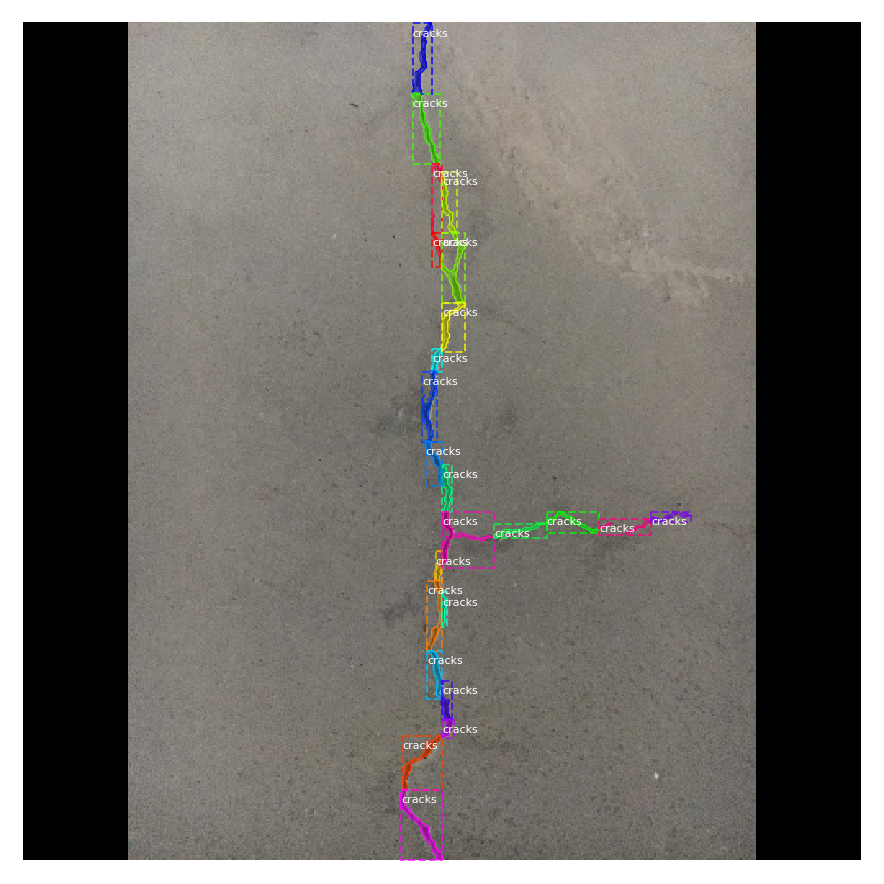

In [ ]:
mask = utils.expand_mask(bbox, mask, image.shape)
log("mask",mask)
visualize.display_instances(image, bbox, mask, class_ids, dataset.class_names)

In [ ]:
def image_stats(image_id):
    """Returns a dict of stats for one image."""
    image = dataset.load_image(image_id)
    mask, _ = dataset.load_mask(image_id)
    bbox = utils.extract_bboxes(mask)
    # Sanity check
    # Return stats dict
    return {
        "id": image_id,
        "shape": list(image.shape),
        "bbox": [[b[2] - b[0], b[3] - b[1]]
                 for b in bbox
                 # Uncomment to exclude nuclei with 1 pixel width
                 # or height (often on edges)
                 # if b[2] - b[0] > 1 and b[3] - b[1] > 1
                ],
        "color": np.mean(image, axis=(0, 1)),
    }

# Loop through the dataset and compute stats over multiple threads
# This might take a few minutes
t_start = time.time()
with concurrent.futures.ThreadPoolExecutor() as e:
    stats = list(e.map(image_stats, dataset.image_ids))
t_total = time.time() - t_start
print("Total time: {:.1f} seconds".format(t_total))

In [ ]:
import random

In [ ]:
a=[1,2,3,4,5,6]
a=random.sample(a,int(len(a)*0.5))

In [ ]:
data_dir=os.path.join(DATASET_DIR,"stage1_train\\images")
img_ids=next(os.walk(data_dir))[2]
for j in range(len(img_ids)):
    img_ids[j]=os.path.splitext(img_ids[j])[0]
VAL_IMAGE_IDS= random.sample(img_ids,int(len(img_ids)*0.1))